## AR模型的前提假设

`AR（自回归模型）`适用于“时间-标签”一一对应的单变量时序数据，AR模型的基本思想可以被概括为一句谚语：罗马城不是一日建成的，今天的结果一定依赖于过去的积累，因此AR模型相信：一个时间点上的标签值一定是依赖于之前的时间点上的标签值而存在的。所以有两个重要的假设：

1. 时序依赖性：在AR模型中，我们假设不同时间点的标签值之间存在强相关性。这意味着一个给定时间点的标签值受到其过去的标签值的显著影响。在数学上，这表现为两个时间点的标签值之间的相关系数较大。换言之，过去的信息对预测未来具有重要影响。

2. 时序衰减：另一个基础假设是，两个时间点之间的距离越远，他们之间的关联性越弱。例如，昨天的天气可能对今天的天气影响很大，但三个月前的某一天的天气，对今天的天气的影响就相对微弱。

基于这两个假设，AR模型将时间点之间的关系建模为：一个时间点的标签值可以由其过去某个时间段内的所有标签值的线性组合表示。这个线性组合可以理解为对过去信息的加权求和，每个过去时间点的信息都通过一个相应的权重（在AR模型中，这个权重是模型参数）来反映其对当前时间点的影响。公式体现如下：
$$
Y_t=c+α_1Y_{t-1}+α_2Y_{t-2}+...+α_pY_{t-p}+ξ_t
$$
是一个标准的AR模型的数学表示，其中p代表所使用的时间滞后（lags）的数量
* $Y_t$:示在时间点t的时间序列值。也就是在时间点t tt时的标签（训练时这里使用真实标签，预测时这里输出预测标签）
* c:表示模型的常数项，也叫做截距项。在某些情况下，这个值可能被设置为0，使得模型不包含常数项。
+ $α_1Y_{t-1}+α_2Y_{t-2}+...+α_pY_{t-p}$:这些项表示过去的p个时间点的时间序列值对当前时间点的影响。其中，$α_i$ 是第i个滞后项的系数，代表了第i个滞后项对当前时间点的相对影响力。$Y_{t-i}$ 则是在时间点t-i的时间序列值。我们可以根据不同的场景规定t tt与t − 1 t-1t−1之间具体的时间间隔大小，但在同一个时间序列中，t与t − 1之间的间隔一定是等同于t − n与t − ( n − 1 )之间的间隔

# MA模型
`移动平均模型（MA模型）`是时间序列分析中的一种模型，它描述的是当前时间点的数据与过去噪声的关系。严格定义上来讲：其模型的定义是基于白噪声序列的假设。白噪声是一种特殊的时间序列模型，每个时间点的数据都是独立且服从相同分布的，且具有常数的均值和方差。给定一个白噪声序列 ${\epsilon_t }$ 模型定义为：
$$
Y_t=μ +\epsilon _t+\theta _1 \epsilon _{t-1} +\theta _2 \epsilon _{t-2} +...+\theta _q \epsilon _{t-q}
$$
这一公式被称之为是q阶的移动平均模型，写作MA(q),其中，

+ $Y_t$ 是我们感兴趣的时间序列，在时间点t的观察值。
+ μ是时间序列的均值或期望值，这个值对所有的时间点都是相同的。在许多实际的时间序列分析中，我们假设时间序列已经通过某种方式（例如，通过差分或去趋势）转换为均值为零的序列。但在完整的MA模型中，这个均值项μ是存在的
+ ϵ : 这些是所谓的白噪声项，每个时间点的值都是独立同分布的，通常假设为正态分布。这些项的均值为0，方差为σ²（一个常数）。$\epsilon _t $ 是当前时刻的白噪声，$ \epsilon _{t-1} $ 是上一时刻的白噪声，依此类推，$ \epsilon_ {t-q}$ 是q个时刻前的白噪声。
+ $ \theta _1,\theta _2...\theta _q$ :这些是MA模型的参数，每个参数θ都对应于一个白噪声项。它们衡量的是对应的白噪声对当前时间点的影响程度
+ q 是阶数，表示有多少个过去的白噪声项被纳入模型，指的是在模型中包含的过去白噪声项的数量。例如，如果q=2，那么模型就包含了 $\epsilon_{t-1} $ 和 $\epsilon_{t-2}$两个白噪声项。

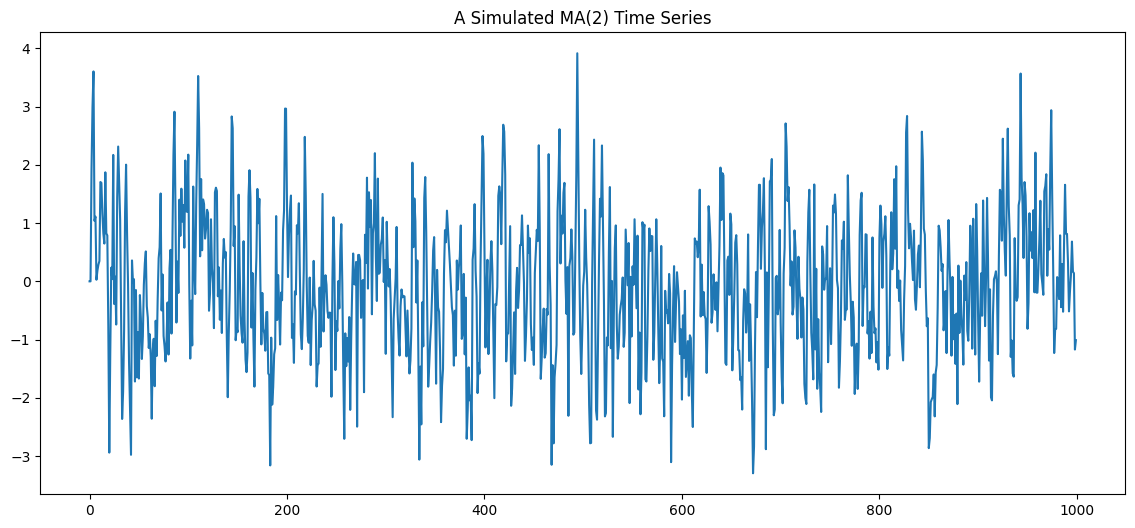

In [1]:
# MA
import numpy as np
import matplotlib.pyplot as plt

np.random .seed(0)

Z=np.random.normal(size=1000)
theta=[0.6,0.4]
X=np.zeros_like(Z)

#生成X
for t in range(2,len(Z)):
    X[t]=Z[t]+theta[0]*Z[t-1]+theta[1]*Z[t-2]

plt.figure(figsize=(14,6))
plt.plot(X)
plt.title("A Simulated MA(2) Time Series")
plt.show()

AR（自回归）模型和MA（移动平均）模型虽然在形式上看起来很相似，但是他们的关键区别在于他们对过去信息的处理方式。对于自回归（AR）模型来说：在这种模型中，当前值是过去值的函数。也就是说，我们是在使用过去的"实际"观察值来预测现在的值。AR模型的基本思想是过去的观测值会对未来的观测值产生影响，即未来的观测值是过去观测值的加权和。对MA模型来说：在这种模型中，当前值是过去噪声（或称之为误差或冲击）的函数。这里的“白噪声”实际上是模型无法解释的随机部分，是未能被模型捕获的信息。换句话说，MA模型是在试图用过去的"错误"或"冲击"来预测现在的值。

# MA模型的前提假设
移动平均模型（MA）的基本假设可以从以下几个方面来理解：

1. 平稳性：MA模型假设时间序列是平稳的。这意味着序列的主要统计属性，如均值和方差，不随时间变化。这个假设强调了序列在长期内保持稳定的行为，而在短期内可能会受到随机因素的影响。

2. 白噪声：MA模型假设存在一个白噪声序列。白噪声是随机误差项，它的均值为0，方差为常数，且各个时间点上的值是相互独立的。这个假设强调了在一段较短的时间内，时间序列的波动可能受到不可预测的随机因素的影响。

3. 线性：MA模型假设时间序列可以被过去的白噪声项的线性组合表示。这就是模型被称为“移动平均”模型的原因，因为它的预测值是过去白噪声的加权平均。

4. 有限历史影响：MA模型假设只有过去的q个白噪声才对当前时间点的值有影响，其中q是模型的阶数。换句话说，过去更久的白噪声对当前值没有直接影响。

5. 标签值的关联性与白噪声的独立性：MA模型假设不同时间点的标签值之间是关联的，这反映了历史标签影响时间序列的长期趋势。而偶然事件在不同时间点上产生的影响（即白噪声）是相互独立的，这反映了在短期内，时间序列的波动可能受到不可预测的随机因素的影响。

举个例子：影响明日会不会下雨的真正因素并不是“今天”或“昨天”这些时间概念本身，而是风、云、日照等更加客观和科学的因素（这些其实就是MA模型认为的“偶然因素”）。不过也能够理解，随着季节的变化、时间自有自己的周期，因此天气也会存在季节性的周期，因此从长期来看时间序列的趋势是恒定的。

## 使用差分消除数据波动
在时间序列中，标签往往具备一定的周期性：例如，标签可能随季节有规律地波动（比如在夏季标签值高、在冬季标签值较低等），也可能随一周的时间有规律地波动（比如在周末较高、在工作日较低等）。这种波动可以通过滞后差分来消除，我们生成一个人造的不平稳时间序列，并通过差分使其平稳。我们将利用Numpy和Pandas库生成这个序列，然后用同样的步骤进行检验和可视化。代码如下：

Results of Dickey-Fuller Test:
Test Statistic                 -1.132038
p-value                         0.702128
#Lags Used                      0.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -9.158402e+00
p-value                        2.572287e-15
#Lags Used                     0.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -5.459820
p-value                         0.000003
#Lags Used                     11.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.58

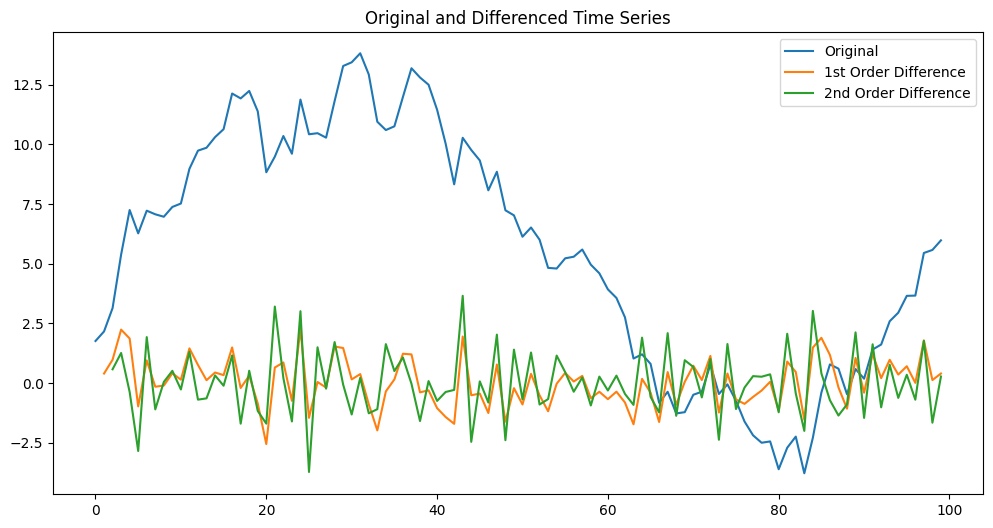

In [2]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 创建一个函数来检查数据的平稳性
def test_stationarity(timeseries):
    # 执行Dickey-Fuller测试
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# 生成不平稳的时间序列
np.random.seed(0)
n = 100
x = np.cumsum(np.random.randn(n))

# 把它转换成Pandas的DataFrame格式
df = pd.DataFrame(x, columns=['value'])

# 检查原始数据的平稳性
test_stationarity(df['value'])

# 进行一阶差分
df['first_difference'] = df['value'] - df['value'].shift(1)

# 检查一阶差分后的数据的平稳性
test_stationarity(df['first_difference'].dropna())

# 进行二阶差分
df['second_difference'] = df['first_difference'] - df['first_difference'].shift(1)

# 检查二阶差分后的数据的平稳性
test_stationarity(df['second_difference'].dropna())

# 可视化原始数据和差分后的数据
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Original')
plt.plot(df['first_difference'], label='1st Order Difference')
plt.plot(df['second_difference'], label='2nd Order Difference')
plt.legend(loc='best')
plt.title('Original and Differenced Time Series')
plt.show()



## 时序数据的平稳性
当我们说一个时间序列是平稳的，基本上意味着其统计特性（如均值，方差）在时间上是常数或不会随时间变化。平稳性是ARIMA模型所假设的关键特性，因为模型的预测能力在很大程度上取决于这个假设。

我们生成1000个数据点的平稳和非平稳时间序列。在非平稳序列中，我们增加了一个正弦项，以产生更明显的波动。这样，就可以看到一个具有明显周期性和变化幅度的非平稳序列

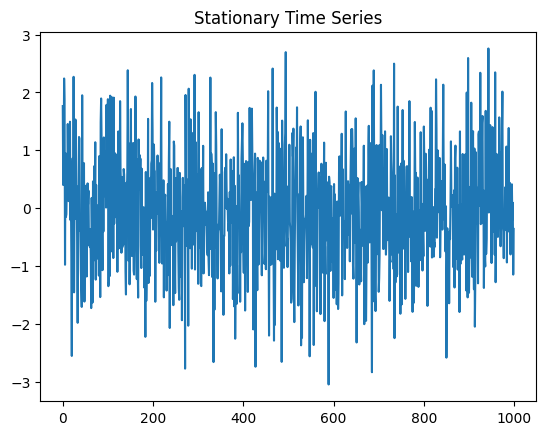

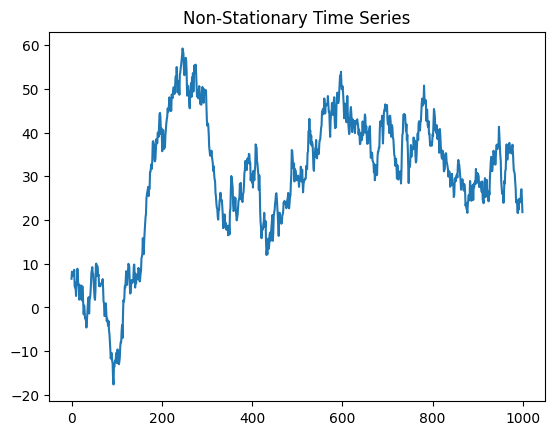

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可重复
np.random.seed(0)

# 生成平稳时间序列
stationary = np.random.normal(loc=0, scale=1.0, size=1000)
s_ts = pd.Series(stationary)
s_ts.plot()
plt.title('Stationary Time Series')
plt.show()

# 生成非平稳时间序列
non_stationary = np.cumsum(np.random.normal(loc=0, scale=2.0, size=1000)) + 10 * np.sin(np.linspace(-10, 10, 1000))
ns_ts = pd.Series(non_stationary)
ns_ts.plot()
plt.title('Non-Stationary Time Series')
plt.show()


## 自相关函数ACF (Auto-Correlation Function)
在深入理解`ACF`之前，我们先来理解一下"相关性"的基本概念。一般来说，"相关性"用于衡量两个变量之间的线性关系。对于时间序列数据，这两个变量通常是在不同时间点的观测值。例如，假设我们有以下一组观测值：[3, 5, 4, 6, 7, 8, 7, 6, 5, 4, 3]，我们可能会问，第t个观测值与第t-1个观测值有多大的相关性？这时，我们就需要用到自相关系数（ACF）来衡量。

在实际应用中，ACF通常被定义为当前时间点上的观测值与历史时间点观测值之间的相关性。这种相关性可以用多种方法来衡量，其中最常用的是皮尔逊相关系数。

这是一个相对宽泛的定义，而在时间序列分析中，ACF有着更为严格的定义。对于任意的滞后（lag）k，我们都计算出在时间t和时间t+k的数据点之间的协方差，然后除以该时间序列的方差。这样得到的结果反映了时间序列自身的相关性。

数学上，自相关函数（ACF）的定义如下：

如果我们有一个时间序列 ${X_t}$，那么对于任意的滞后（lag）k，自相关函数 ρ(k) 可以表示为
$$
p(k)=Cov(X_t,X_{t+k})/Var(X_t)
$$

ACF 的取值范围是 -1 到 1。当 ACF 接近 1 时，表示两个时间点的观测值高度正相关；当 ACF 接近 -1 时，表示两个时间点的观测值高度负相关；当 ACF 接近 0 时，表示两个时间点的观测值之间的相关性较弱。

通过计算不同滞后值下的 ACF，我们可以得到一个关于滞后的函数，这就是自相关函数。我们通常使用自相关图（ACF 图）来直观地表示这个函数

## 偏自相关函数（Partial Auto-correlation Function， PACF）
在理解PACF之前，我们需要先理解什么是"直接相关性"。直接相关性是指一个变量与另一个变量之间的相关性，而不考虑其他变量的影响。例如，假设我们有以下一组观测值：[3, 5, 4, 6, 7, 8, 7, 6, 5, 4, 3]，我们可能会问，第t个观测值与第t-2个观测值之间有多大的直接相关性，而这个直接相关性并没有考虑第t-1个观测值的影响。这时，我们就需要用到偏自相关系数（PACF）来衡量。

在时间序列分析中，偏自相关函数（PACF）衡量的是在其他更早期的滞后（lag）观测值已经被考虑后，当前时间点的观测值与某个滞后观测值之间的"直接相关性"。换句话说，PACF表示的是两个观测值之间的相关性，去掉其他滞后观测值的影响。

数学上，偏自相关函数（PACF）的定义如下：

如果我们有一个时间序列 ${X_t}$，那么对于任意的滞后（lag）k，偏自相关函数 φ(k) 可以表示为：
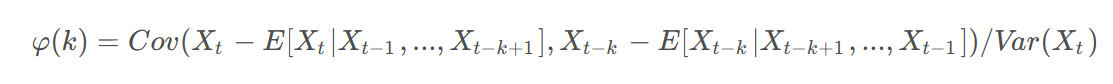

其中，Cov表示协方差，E表示期望，也就是平均值，Var表示方差。我们可以看到，PACF的计算过程实际上是先去掉其他更早期的滞后观测值的影响，然后再计算相关性。

PACF的取值范围也是 -1 到 1。当 PACF 接近 1 时，表示两个时间点的观测值高度正相关；当 PACF 接近 -1 时，表示两个时间点的观测值高度负相关；当 PACF 接近 0 时，表示两个时间点的观测值之间的直接相关性较弱。

通过计算不同滞后值下的 PACF，我们可以得到一个关于滞后的函数，这就是偏自相关函数。我们通常使用偏自相关图（PACF 图）来直观地表示这个函数

### 让我们换一种更通俗的方式来理解ACF和PACF。

假设我们在观察一个湖泊的水温。假设我们每天都在固定的时间测量水温，并记录下来。

`自相关系数（ACF）`： 自相关就好比我们在考虑"今天的水温是否会受到昨天水温的影响？"如果昨天的水温很高，那么今天的水温可能也会偏高。这种相互影响可以用自相关系数来衡量。换句话说，自相关系数可以帮助我们理解在时间序列中，一个时间点的值如何影响另一个时间点的值。

`偏自相关系数（PACF）`： 偏自相关在这个例子中，可以被理解为"在已知昨天水温的情况下，今天的水温还会受到前天水温的影响吗？“也就是说，我们在计算今天和前天的水温关系时，已经考虑并剔除了昨天水温的影响。这种关系被称为"偏自相关”。

用这种方式理解，我们可以更直观地看到ACF和PACF的区别。ACF是直接考虑相邻两天的水温的关系，而PACF是在已知昨天水温的情况下，考虑今天和前天的水温的关系。


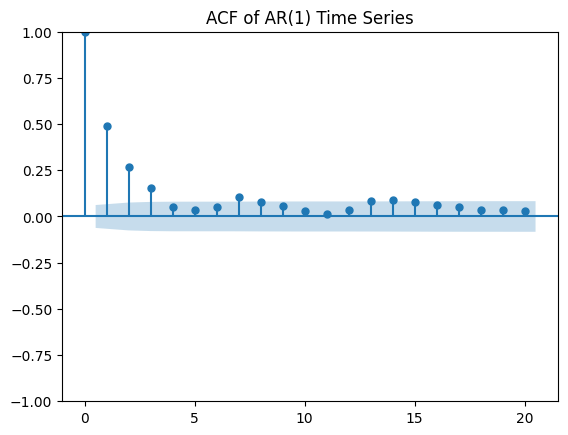

d:\Scoop\apps\anaconda3\2023.07-2\App\envs\test\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


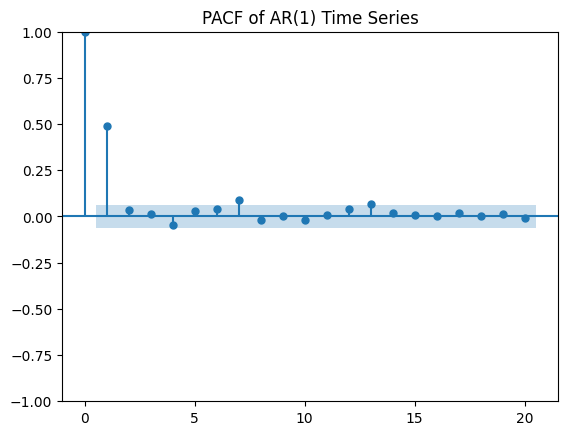

In [4]:
#ACF vs PACF

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# 设置随机种子以确保结果可重复
np.random.seed(0)

# 生成AR(1)时间序列数据
ar = np.array([1, -0.5])  # 我们将使用的AR模型的参数
ma = np.array([1])  # 这是MA模型的参数，在这个例子中我们不需要它
n = int(1000)  # 我们将生成的数据点的数量

arma_process = sm.tsa.ArmaProcess(ar, ma)
y = arma_process.generate_sample(nsample=n)

# 绘制ACF图像
plot_acf(y, lags=20)
plt.title('ACF of AR(1) Time Series')
plt.show()

# 绘制PACF图像
plot_pacf(y, lags=20)
plt.title('PACF of AR(1) Time Series')
plt.show()


ACF图和PACF图的横坐标相同，都是不同的滞后程度，纵坐标是当前滞后程度下序列的ACF和PACF值。背景为蓝色的区域代表着95%或99%的置信区间，当ACF/PACF值在蓝色区域之外时，我们就认为当前滞后程度下的ACF/PACF是统计上显著的值，即这个滞后程度下的序列之间的相关性很大程度上是信任的、不是巧合。需要注意的是，当滞后为0时，ACF和PACF值必然为1，因为一个序列与自己始终完全相关，因此ACF和PACF图上有意义的值是从滞后为1的值开始看

详细地解释一下这个过程：

AR(1)模型是一种自回归模型，它的当前值只依赖于前一步的值。所以，对于一个AR(1)模型，我们有：
$$
X[t]=c+φX[t-1]+ε[t]
$$
其中X[t]是当前时间点的值，X[t-1]是前一时间点的值，c是常数，φ是自回归系数，ε[t]是噪声项。

ACF衡量的是时间序列与其自身滞后版本之间的相关性。对于AR(1)模型，其ACF应在滞后1时有一个峰值，然后逐渐衰减。原因是，当滞后1时，我们实际上在比较X[t]和X[t-1]，它们是直接相关的，所以有一个峰值。而当滞后增加时，比如滞后2时，我们在比较X[t]和X[t-2]，虽然X[t]和X[t-2]之间存在间接的关联（通过X[t-1]），但是这种关联会随着滞后的增加而衰减。

部分自相关函数（PACF）：PACF衡量的是时间序列与其滞后版本之间的相关性，但是要剔除中间滞后项的影响。对于AR(1)模型，其PACF应在滞后1时有一个峰值，然后突然降到0。原因是，当滞后1时，我们实际上在比较X[t]和X[t-1]，它们是直接相关的，所以有一个峰值。而当滞后增加时，比如滞后2时，我们在比较X[t]和X[t-2]，尽管它们之间存在间接的关联，但是这种关联被X[t-1]的影响所剔除，所以PACF在滞后2以后的值应接近于0。

因此，ACF和PACF的图像是反映AR(1)模型结构的重要工具。通过它们，我们可以看出时间序列的当前值主要依赖于前一步的值，而与更早的历史值的关联性较弱。

# 选择超参数p、q和d
<br>

| `ARIMA(p,d,q)` | `模型类型`| `模型解释` |
----|----|----
| ARIMA(0,d,0) | 随机游走模型或白噪声模型 | 当d=1时，是随机游走模型；当d=0时，是白噪声模型 |
----|----|----
| ARIMA(0,d,q) | MA模型或IMA模型 | 当d=0时，是MA(q)模型；当d≠0时，是IMA(d,q)模型 |
----|----|----
| ARIMA(p,d,0) | AR模型或ARIMA模型 | 当d=0时，是AR模型；当d≠0时，是ARIMA(p,d,0)模型 |
----|----|----
|ARIMA(p,d,q) | ARMA模型或ARIMA模型 | 当d=0时，是ARMA(p, q)模型；当d≠0时，是ARIMA(p,d,q)模型 |

`AR模型（Autoregressive Model）`：自回归模型，它将当前值与过去p个值的线性组合进行比较。<br>
`MA模型（Moving Average Model）`：移动平均模型，它将当前值与过去q个误差项的线性组合进行比较。<br>
`ARMA模型（Autoregressive Moving Average Model）`：自回归移动平均模型，它是AR模型和MA(q)模型的组合。<br>
`ARIMA模型（Autoregressive Integrated Moving Average Model）`：自回归积分移动平均模型，它是ARMA(p, q)模型的扩展，增加了差分的步骤，使得非平稳序列变得平稳。<br>
`IMA模型（Integrated Moving Average Model）`：积分移动平均模型，它是MA(q)模型的扩展，增加了差分的步骤，使得非平稳序列变得平稳。

d:\Scoop\apps\anaconda3\2023.07-2\App\envs\test\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


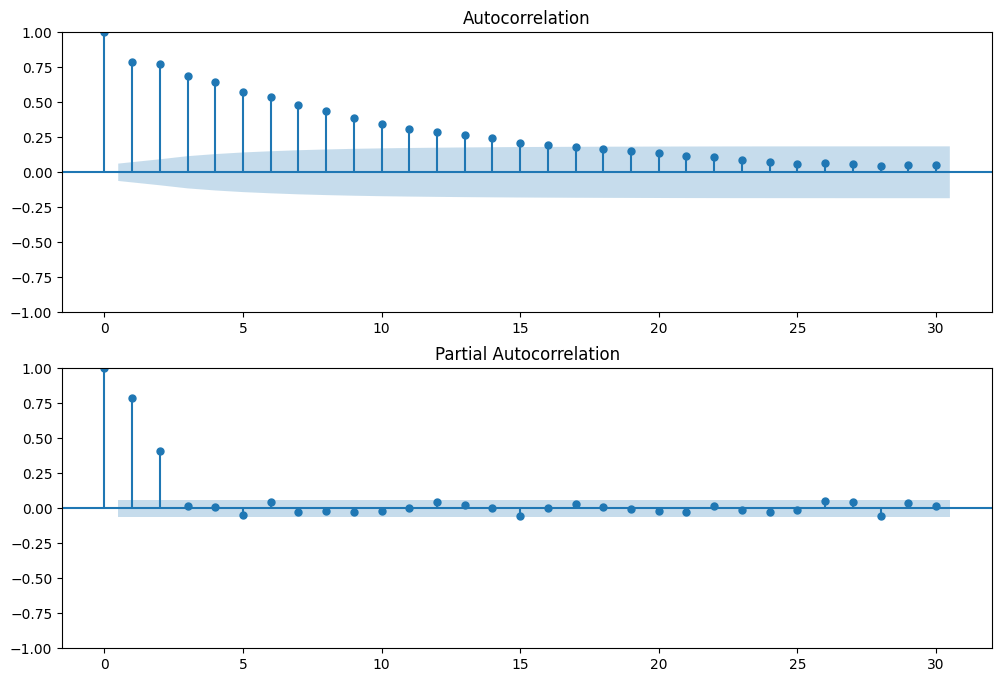

In [5]:
#超参数p的确定
#对于AR模型，ACF会展现出拖尾的形式，而PACF则在p阶后突然截尾。

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 参数
ar = np.array([1, -0.5, -0.4])
ma = np.array([1])

# 生成AR(2)过程
ar2_process = ArmaProcess(ar, ma)
ar2_sample = ar2_process.generate_sample(nsample=1000)

# 绘制ACF和PACF
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(ar2_sample, ax=plt.gca())
plt.subplot(212)
plot_pacf(ar2_sample, ax=plt.gca())
plt.show()


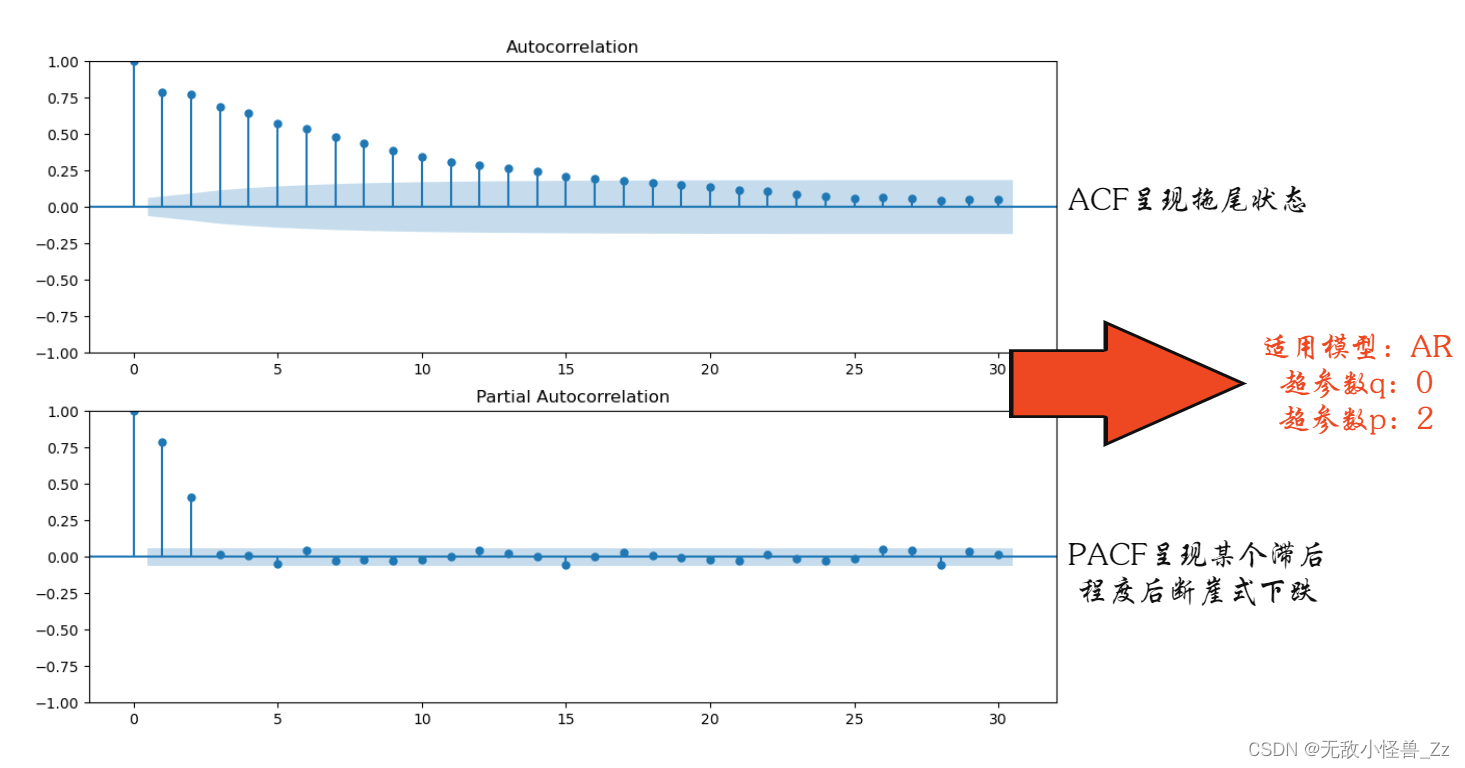

d:\Scoop\apps\anaconda3\2023.07-2\App\envs\test\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


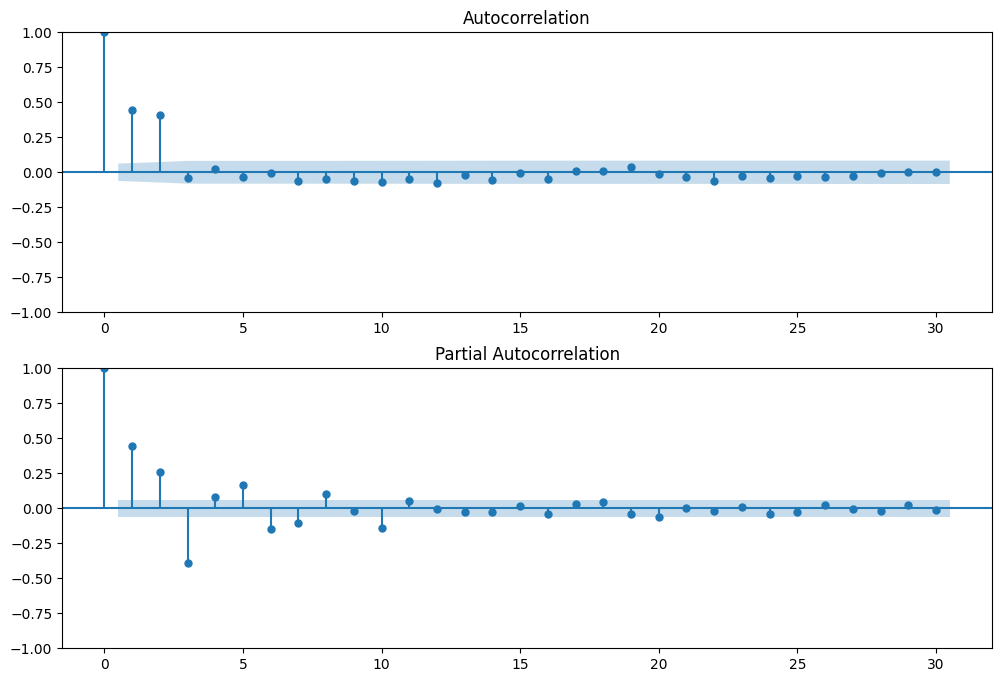

In [6]:
#超参数q的确定
#对于MA模型，ACF在q阶后突然截尾，而PACF则呈现拖尾的形式

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 定义MA模型的参数
ar = np.array([1])
ma = np.array([1, 0.5, 0.7])
np.random.seed(1)

# 创建ARMA模型
arma_process = ArmaProcess(ar, ma)
sample = arma_process.generate_sample(nsample=1000)

# 绘制ACF和PACF图
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(sample, ax=plt.gca(), lags=30)
plt.subplot(212)
plot_pacf(sample, ax=plt.gca(), lags=30)
plt.show()



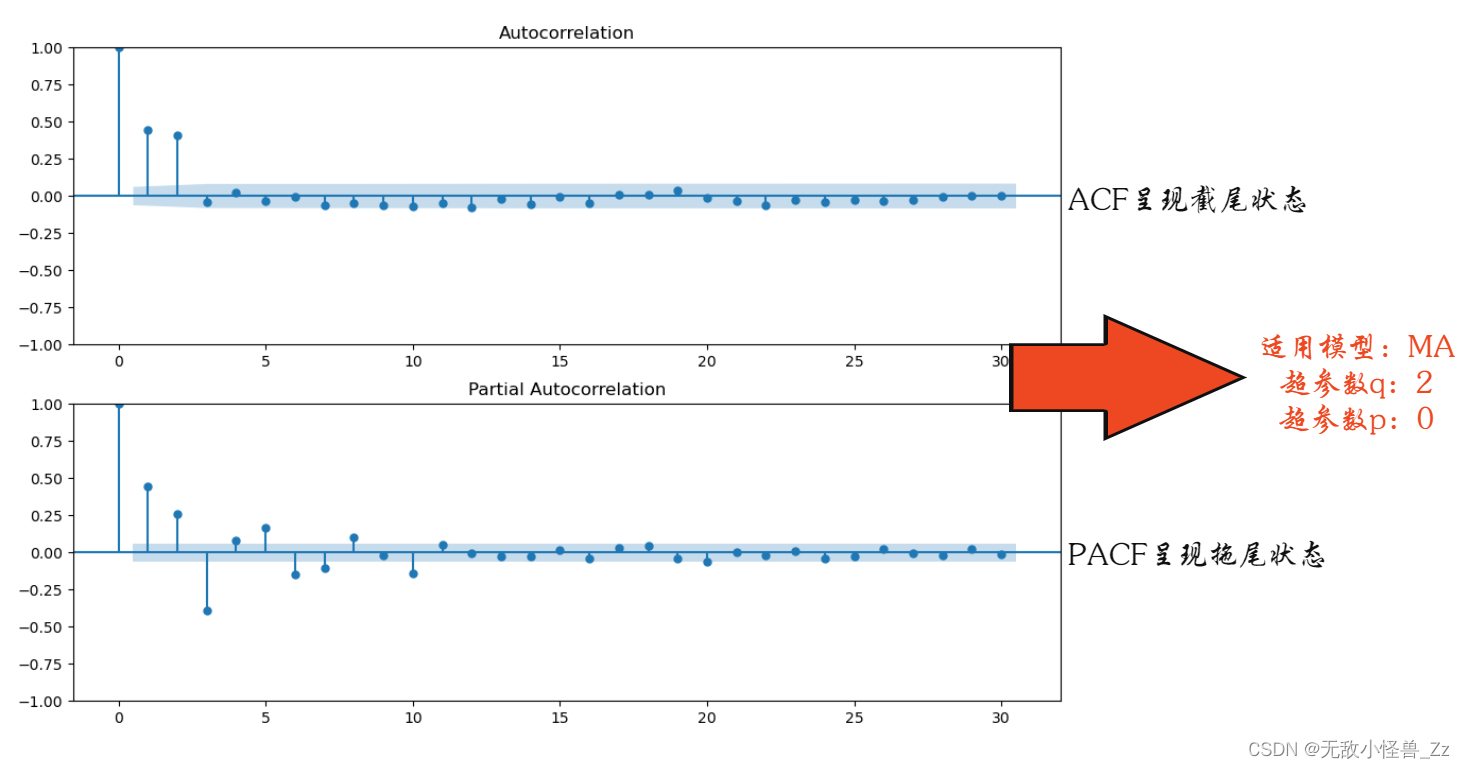

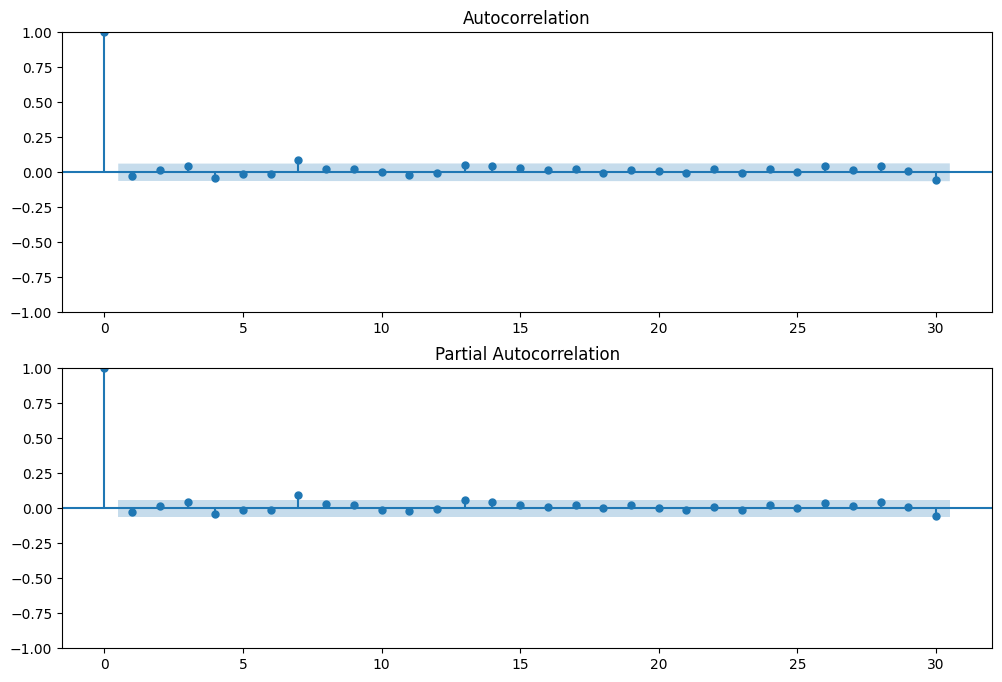

In [8]:
#一般情况下如何确定p和q

import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

np.random.seed(0)
random_series = np.random.normal(size=1000)

plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(random_series, ax=plt.gca())
plt.subplot(212)
plot_pacf(random_series, ax=plt.gca())
plt.show()


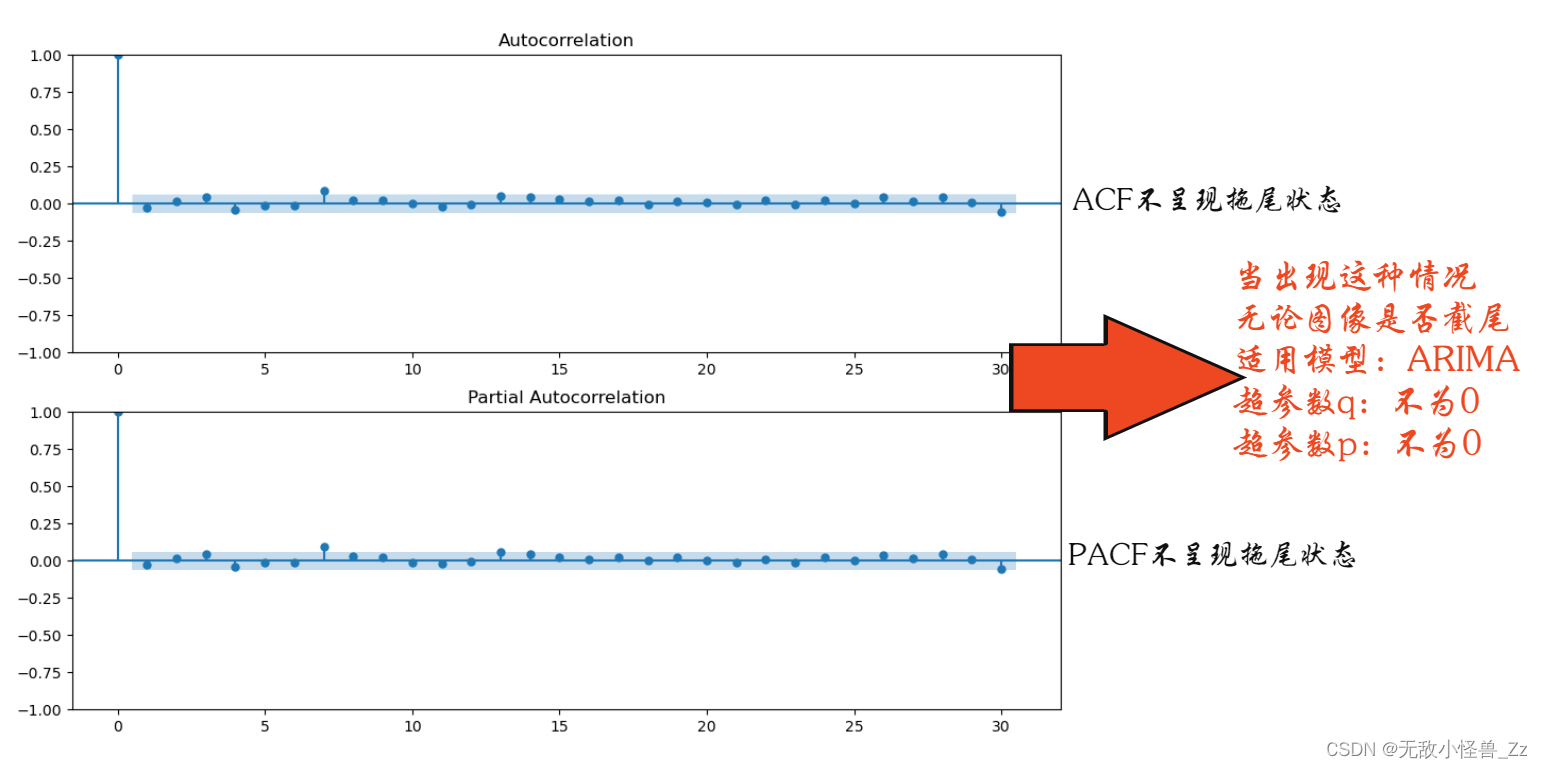

目前实践中最好的方法依然是**傻瓜式尝试**。在ARIMA模型当中，p和q的值往往取值不高，一般是[1,5]以内的正整数，因此实践中更常用的方法是从最小值p=1、q=1的方式开始进行尝试，不断改变p和q的取值，直到模型通过检验或达到我们需要的精度要求

# new arima tech

In [11]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math
 
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from common.utils import load_data, mape
from IPython.display import Image
 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from statsmodels.tsa.stattools import adfuller  # adf检验库
from statsmodels.stats.diagnostic import acorr_ljungbox  # 随机性检验库
from statsmodels.tsa.arima_model import ARMA 
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore") # specify to ignore warning messages

ModuleNotFoundError: No module named 'common.utils'